In [55]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sc

In [36]:
df=pd.read_csv('clustering_data.csv',index_col=0)
df

,carat_encoded,cut_encoded,clarity_encoded,color_encoded,depth
0,0.0,4.0,1.0,1.0,61.5
1,0.0,3.0,2.0,1.0,59.8
2,0.0,1.0,4.0,1.0,56.9
3,0.0,3.0,3.0,5.0,62.4
4,0.0,1.0,1.0,6.0,63.3
...,...,...,...,...,...
53935,1.0,4.0,2.0,0.0,60.8
53936,1.0,1.0,2.0,0.0,63.1
53937,1.0,2.0,2.0,0.0,62.8
53938,1.0,3.0,1.0,4.0,61.0


In [37]:
ss=StandardScaler()
df=ss.fit_transform(df)

In [38]:
df

array([[-1.24911489,  0.98170735, -1.24903686, -0.93617807, -0.17306038],
       [-1.24911489,  0.0850596 , -0.64125756, -0.93617807, -1.36370593],
       [-1.24911489, -1.70823589,  0.57430103, -0.93617807, -3.39480716],
       ...,
       [ 0.33919204, -0.81158814, -0.64125756, -1.52440603,  0.73743328],
       [ 0.33919204,  0.0850596 , -1.24903686,  0.82850582, -0.52325025],
       [ 0.33919204,  0.98170735, -1.24903686, -1.52440603,  0.31720544]])

In [39]:
pca=PCA(n_components=2)

In [40]:
data_pc=pca.fit_transform(df)

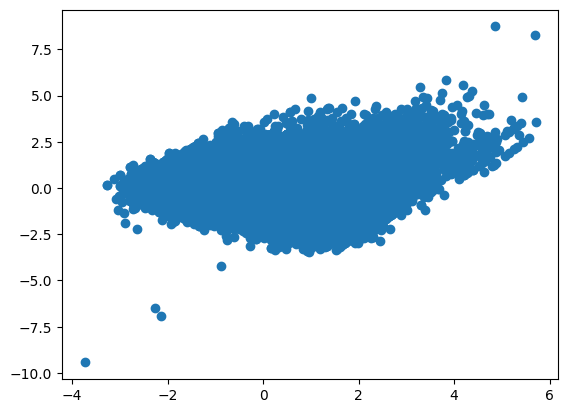

In [57]:
plt.scatter(data_pc[:,0],data_pc[:,1])

In [58]:
pca.explained_variance_

array([1.54364049, 1.10219071])

In [59]:
feature_names = df.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [44]:
# Create DataFrame of loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose so that rows = features, cols = PCs
    columns=['PC1', 'PC2'],
    index=feature_names
)
loadings

,PC1,PC2
carat_encoded,0.575383,-0.426013
cut_encoded,-0.469308,-0.460346
clarity_encoded,-0.549157,0.061368
color_encoded,0.236714,-0.496171
depth,0.301791,0.597195


In [45]:
pca.components_.T

array([[ 0.57538281, -0.42601331],
       [-0.46930756, -0.46034628],
       [-0.54915748,  0.06136764],
       [ 0.2367139 , -0.4961714 ],
       [ 0.3017907 ,  0.59719505]])

In [46]:
print("Explained variance ratio:")
for i, v in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {v:.4f}")


Explained variance ratio:
PC1: 0.3087
PC2: 0.2204


In [47]:
wcss=[] # Within Cluster Sum of Squares
for k in range(1,31):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

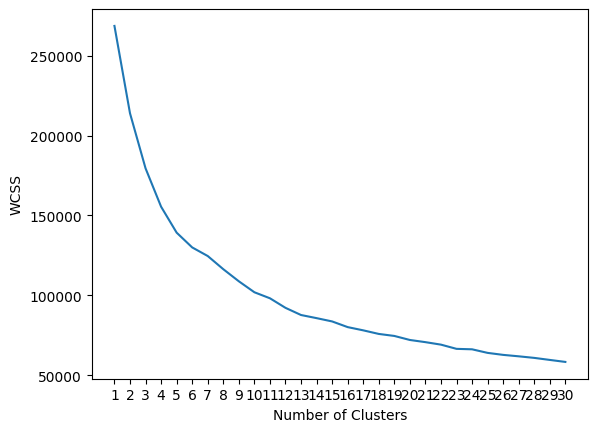

In [48]:
## Plotting Elbow Curve
plt.plot(range(1,31),wcss)
plt.xticks(range(1,31))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [49]:
kl=KneeLocator(range(1,31),wcss,curve='convex',direction='decreasing')
kl.elbow

9

In [50]:
kmeans=KMeans(n_clusters=9,init='k-means++')

In [51]:
kmeans.fit(df)
y_train = kmeans.labels_

In [52]:
centroids=kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[ 0.42478122  0.5427249   1.01299559  0.1205867  -0.05787363]
 [ 0.48610383  0.60311802 -0.65771134 -0.74173178 -0.05533804]
 [ 0.67134988 -2.118132   -0.58144436  0.54116113  2.09113946]
 [-1.24911489  0.57571715  1.45522174  0.2484063  -0.12580921]
 [-1.24148958 -1.06480693  0.13713247 -0.1823293   0.67026328]
 [-1.24911489  0.63868211 -0.19697758 -0.6183195  -0.14971439]
 [ 0.94192296  0.21442823 -0.536864    1.25137255 -0.01646339]
 [ 0.48470552 -1.05041336 -0.444229   -0.51440565  0.70106011]
 [ 0.30111619 -0.83826495 -0.32474921 -0.16903916 -1.85551582]]


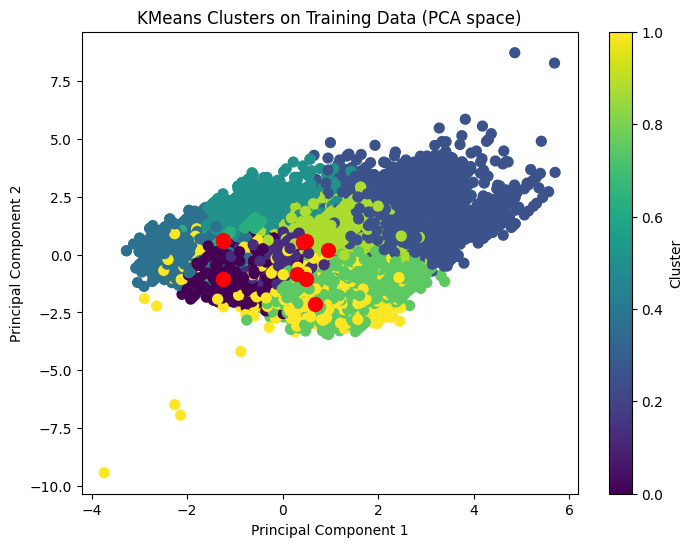

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(data_pc[:, 0], data_pc[:, 1], c=y_train, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title("KMeans Clusters on Training Data (PCA space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [54]:
train_clusters = pd.DataFrame(df, columns=feature_names)
train_clusters['Cluster'] = y_train
cluster_summary = train_clusters.groupby('Cluster').mean()
cluster_summary


,carat_encoded,cut_encoded,clarity_encoded,color_encoded,depth
Cluster,,,,,
0,0.424781,0.542725,1.012996,0.120587,-0.057874
1,0.486125,0.604817,-0.657663,-0.740895,-0.054246
2,0.671878,-2.118071,-0.581349,0.543042,2.092122
3,-1.249115,0.575078,1.455189,0.247861,-0.125960
4,-1.241483,-1.065022,0.136075,-0.181690,0.671216
5,-1.249115,0.638682,-0.196978,-0.618320,-0.149714
6,0.941923,0.214223,-0.536725,1.251373,-0.016247
7,0.484391,-1.050867,-0.444984,-0.516167,0.699535
8,0.301488,-0.837283,-0.325020,-0.169444,-1.855170


MemoryError: Unable to allocate 10.7 GiB for an array with shape (1442838621,) and data type float64

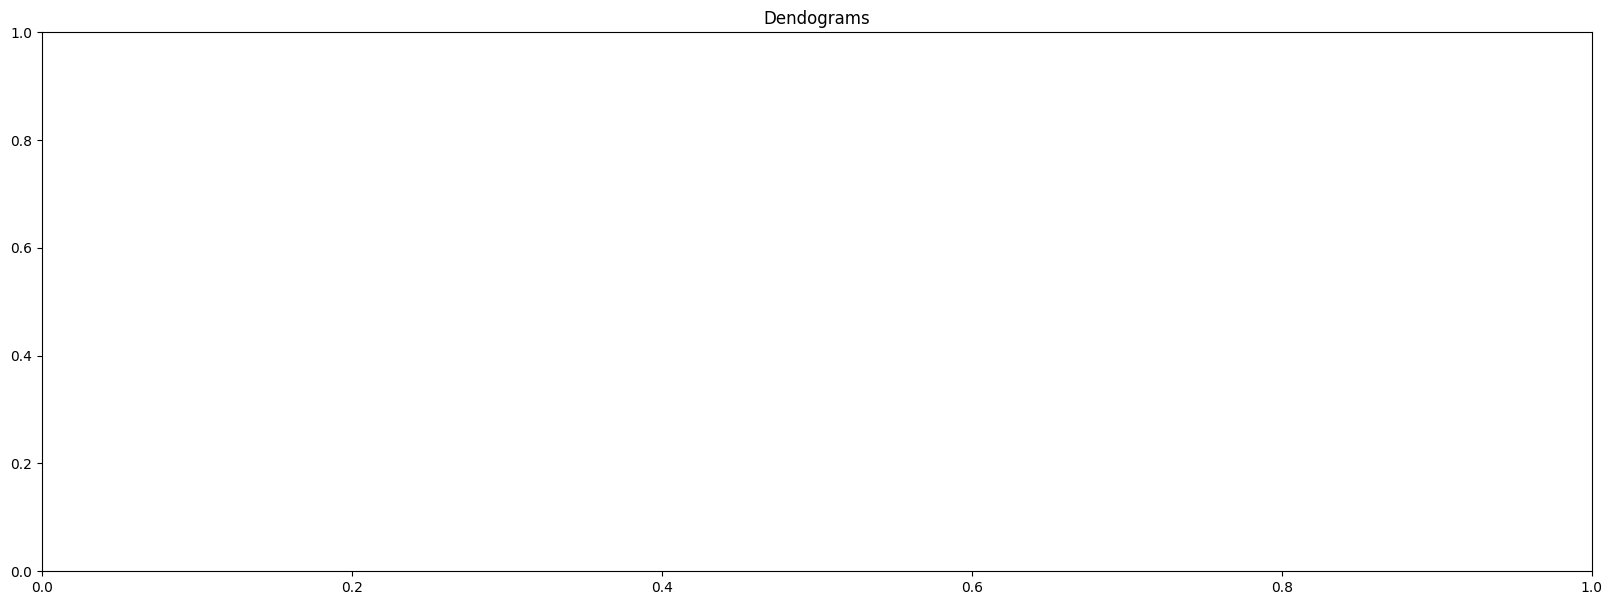

In [61]:
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(data_pc,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward',)
cluster.fit(data_pc)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'